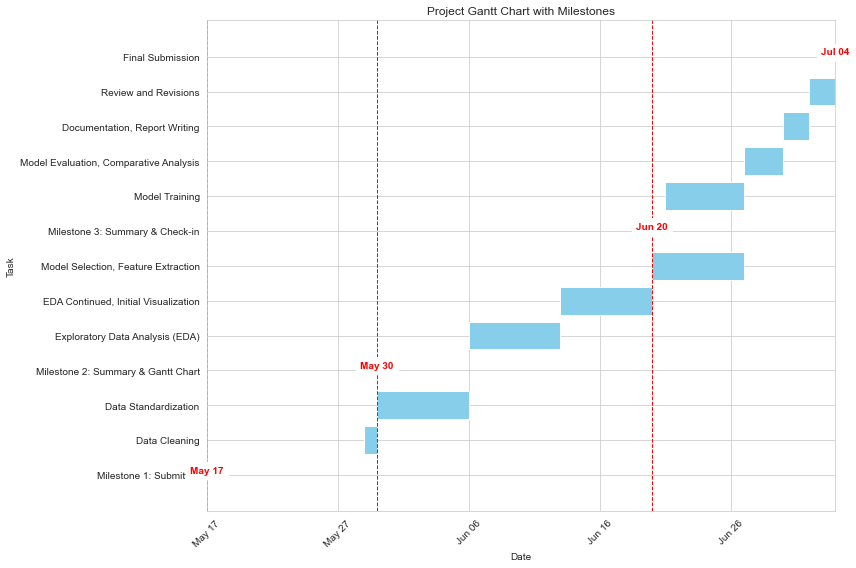

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Task schedule
tasks = {
    'Task': [
        'Milestone 1: Submitted',
        'Data Cleaning',
        'Data Standardization',
        'Milestone 2: Summary & Gantt Chart',
        'Exploratory Data Analysis (EDA)',
        'EDA Continued, Initial Visualization',
        'Model Selection, Feature Extraction',
        'Milestone 3: Summary & Check-in',
        'Model Training',
        'Model Evaluation, Comparative Analysis',
        'Documentation, Report Writing',
        'Review and Revisions',
        'Final Submission'
    ],
    'Start': [
        '2024-05-17', '2024-05-29', '2024-05-30', '2024-05-30',
        '2024-06-06', '2024-06-13', '2024-06-20', '2024-06-20',
        '2024-06-21', '2024-06-27', '2024-06-30', '2024-07-02',
        '2024-07-04'
    ],
    'End': [
        '2024-05-17', '2024-05-30', '2024-06-06', '2024-05-30',
        '2024-06-13', '2024-06-20', '2024-06-27', '2024-06-20',
        '2024-06-27', '2024-06-30', '2024-07-02', '2024-07-04',
        '2024-07-04'
    ]
}

df = pd.DataFrame(tasks)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Milestone dates and labels
milestone_dates = [
    pd.to_datetime('2024-05-17'),
    pd.to_datetime('2024-05-30'),
    pd.to_datetime('2024-06-20'),
    pd.to_datetime('2024-07-04')
]

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))

for i, task in df.iterrows():
    bar_color = 'skyblue' if 'Milestone' not in task['Task'] else 'gold'
    ax.barh(task['Task'], (task['End'] - task['Start']).days, left=task['Start'], color=bar_color)
    if 'Milestone' in task['Task']:
        ax.text(task['Start'], i, '', ha='left', va='center', color='red', fontweight='bold')

# Add vertical lines for milestones
for milestone_date in milestone_dates:
    ax.axvline(milestone_date, color='red', linestyle='--', linewidth=1)

# Highlight milestone dates on the y-axis
for milestone_date, task in zip(milestone_dates, ['Milestone 1: Submitted', 'Milestone 2: Summary & Gantt Chart', 'Milestone 3: Summary & Check-in', 'Final Submission']):
    ax.text(milestone_date, df[df['Task'] == task].index[0], milestone_date.strftime('%b %d'), ha='center', va='bottom', color='red', fontweight='bold', backgroundcolor='white')

ax.set_xlabel('Date')
ax.set_ylabel('Task')
ax.set_title('Project Gantt Chart with Milestones')
ax.xaxis.set_major_formatter(DateFormatter("%b %d"))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
